In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target
feature_names = boston.feature_names
print(X.shape) 
print(y.shape) 
print(feature_names) 

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset: 70% vs 30% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# initiate the linear model and fit with data
lm =LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("The R-squared value is: {0:0.4f} \n".format(lm.score(X_train, y_train)))

The R-squared value is: 0.7645 



In [ ]:
param_df = pd.DataFrame({"Features": ['intercept'] + list(feature_names), 
"Coef": [lm.intercept_] + list(lm.coef_)}) 
cols = param_df.columns.tolist() 
cols = cols[-1:]+cols[:-1] 
param_df = param_df[cols] 
print(param_df)

         Coef   Features
0   37.937108  intercept
1   -0.121310       CRIM
2    0.044466         ZN
3    0.011342      INDUS
4    2.511246       CHAS
5  -16.231253        NOX
6    3.859068         RM
7   -0.009985        AGE
8   -1.500270        DIS
9    0.242143        RAD
10  -0.011072        TAX
11  -1.017753    PTRATIO
12   0.006814          B
13  -0.486738      LSTAT


In [ ]:
#%% check performance on test data 
predicted = lm.predict(X_test)

In [ ]:
import numpy as np
mae = np.mean(abs(predicted-y_test))
rmse = np.sqrt(np.mean((predicted-y_test)**2))
rae = np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

In [ ]:
mae

3.6099040603818096

In [ ]:
rmse

5.214975145375423

In [ ]:
rae

0.5561156583252186

In [ ]:
rse

0.326617449359983

In [ ]:
print("The R-squared value is: {0:0.4f}".format(lm.score(X_test, y_test))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse)) 

The R-squared value is: 0.6734
Mean Absolute Error: 3.609904
Root Mean Squared Error: 5.214975
Relative Absolute Error: 0.556116
Relative Squared Error: 0.326617


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

In [ ]:
# initiate the linear model 
lm = LinearRegression()

In [ ]:
# scale the features 
min_mascaler =  preprocessing.MinMaxScaler()
scaled_minmax = min_mascaler.fit_transform(X_train)
scaled_minmadf = pd.DataFrame(scaled_minmax, columns = feature_names)

In [ ]:
# recursive feature elimination with cross validation, using r-squared as metric 
rfecv = RFECV(estimator=lm, step=1, cv=5) 
rfecv.fit(scaled_minmadf, y_train)

RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [ ]:
# print the optimal number of feature 
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 6


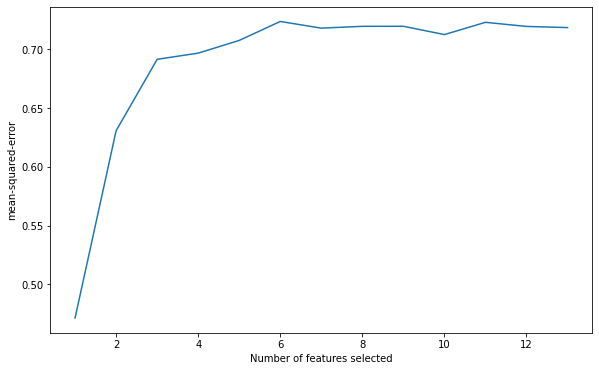

In [ ]:
# plot number of features VS. cross-validation scores 
plt.figure(figsize=(6 * 1.618, 6)) 
plt.xlabel("Number of features selected") 
plt.ylabel("mean-squared-error") 
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

In [ ]:
# %% fit model с выбранными функциями  
#%% fit model with selected features X_train_new = X_train[:,rfecv.support_] 
X_train_new = X_train[:,rfecv.support_]
lm2 = LinearRegression() 
lm2.fit(X_train_new, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predicted = lm2.predict(X_train_new)
 
rmse = np.sqrt(np.mean((predicted-y_train)**2))
print("Root Mean Squared Error: {0:0.4f}" .format(rmse)) 

Root Mean Squared Error: 4.6594


In [ ]:
# print the R-squared 
print("The R-squared value is: {0:0.4f} \n".format(lm2.score(X_train_new, y_train)))

The R-squared value is: 0.7439 



In [ ]:
feature_cols_selected = list(np.array(feature_names)[rfecv.support_]) 
# print intercept and coefficients
param_df = pd.DataFrame({"Features": ['intercept'] + feature_cols_selected , 
"Coef": [lm2.intercept_] + list(lm2.coef_)})

cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1] 
param_df = param_df[cols] 
print(param_df)

        Coef   Features
0  37.722274  intercept
1  -0.086733       CRIM
2 -17.797964        NOX
3   4.244288         RM
4  -1.177934        DIS
5  -1.111761    PTRATIO
6  -0.529948      LSTAT


In [ ]:
# %% проверить производительность по тестовым данным 
#%% check performance on test data
X_test_part = X_test[:,rfecv.support_]
predicted = lm2.predict(X_test_part)

In [ ]:
mae = np.mean(abs(predicted-y_test))
rmse = np.sqrt(np.mean((predicted-y_test)**2))
rae = np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

In [ ]:
# print metrics on test data
print("The R-squared value is: {0:0.4f} \n".format(lm2.score(X_train_new, y_train)))
print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))  

The R-squared value is: 0.7439 

Mean Absolute Error: 3.867736
Root Mean Squared Error: 5.553711
Relative Absolute Error: 0.595835
Relative Squared Error: 0.370426


#Ridge regression and classification

In [ ]:
 from sklearn import linear_model
Ridge = linear_model.Ridge(alpha=.5)

In [ ]:
Ridge.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
print("The R-squared value is: {0:0.4f} \n".format(Ridge.score(X_train, y_train)))

The R-squared value is: 0.7636 



In [ ]:
param_df = pd.DataFrame({"Features": ['intercept'] + list(feature_names), 
"Coef": [Ridge.intercept_] + list(Ridge.coef_)}) 
cols = param_df.columns.tolist() 
cols = cols[-1:]+cols[:-1] 
param_df = param_df[cols] 
print(param_df)

         Coef   Features
0   34.300362  intercept
1   -0.119304       CRIM
2    0.045544         ZN
3   -0.010056      INDUS
4    2.494654       CHAS
5  -10.944654        NOX
6    3.891324         RM
7   -0.015310        AGE
8   -1.431997        DIS
9    0.226087        RAD
10  -0.011430        TAX
11  -0.960260    PTRATIO
12   0.007115          B
13  -0.491044      LSTAT


In [ ]:
predicted_Ridge = Ridge.predict(X_test)

In [ ]:
mae = np.mean(abs(predicted_Ridge-y_test))
rmse = np.sqrt(np.mean((predicted_Ridge-y_test)**2))
rae = np.mean(abs(predicted_Ridge-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_Ridge-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

In [ ]:
print("The R-squared value is: {0:0.4f}".format(Ridge.score(X_test, y_test))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse)) 

The R-squared value is: 0.6695
Mean Absolute Error: 3.599391
Root Mean Squared Error: 5.246272
Relative Absolute Error: 0.554496
Relative Squared Error: 0.330549


###Setting the regularization parameter: leave-one-out Cross-Validation

In [ ]:
RidgeCV = linear_model.RidgeCV(alphas=np.logspace(0, 1),normalize=True, cv=10)
RidgeCV

RidgeCV(alphas=array([ 1.        ,  1.04811313,  1.09854114,  1.1513954 ,  1.20679264,
        1.26485522,  1.32571137,  1.38949549,  1.45634848,  1.52641797,
        1.59985872,  1.67683294,  1.75751062,  1.84206997,  1.93069773,
        2.02358965,  2.12095089,  2.22299648,  2.32995181,  2.44205309,
        2.55954792,  2.6826958 ,  2.8117687 ,  2.9470517 ,  3.0888436 ,
        3.23745754,  3.39322177,  3.55648031,  3.72759372,  3.90693994,
        4.09491506,  4.29193426,  4.49843267,  4.71486636,  4.94171336,
        5.17947468,  5.42867544,  5.68986603,  5.96362332,  6.25055193,
        6.55128557,  6.86648845,  7.19685673,  7.54312006,  7.90604321,
        8.28642773,  8.68511374,  9.10298178,  9.54095476, 10.        ]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [ ]:
RidgeCV.fit(X_train, y_train)
print("The R-squared value is: {0:0.4f} \n".format(RidgeCV.score(X_train, y_train)))
param_df = pd.DataFrame({"Features": ['intercept'] + list(feature_names), 
"Coef": [RidgeCV.intercept_] + list(RidgeCV.coef_)}) 
cols = param_df.columns.tolist() 
cols = cols[-1:]+cols[:-1] 
param_df = param_df[cols] 
print(param_df)

The R-squared value is: 0.6677 

         Coef   Features
0   22.729930  intercept
1   -0.068001       CRIM
2    0.019307         ZN
3   -0.076506      INDUS
4    2.207492       CHAS
5   -3.464466        NOX
6    2.880140         RM
7   -0.011214        AGE
8   -0.257843        DIS
9   -0.013911        RAD
10  -0.002939        TAX
11  -0.617432    PTRATIO
12   0.005850          B
13  -0.254915      LSTAT


In [ ]:
predicted_RidgeCV = RidgeCV.predict(X_test)
mae = np.mean(abs(predicted_RidgeCV-y_test))
rmse = np.sqrt(np.mean((predicted_RidgeCV-y_test)**2))
rae = np.mean(abs(predicted_RidgeCV-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_RidgeCV-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("The R-squared value is: {0:0.4f}".format(RidgeCV.score(X_test, y_test))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse)) 

The R-squared value is: 0.5669
Mean Absolute Error: 4.085867
Root Mean Squared Error: 6.005352
Relative Absolute Error: 0.629439
Relative Squared Error: 0.433124


##Lasso

In [ ]:
Lasso = linear_model.Lasso(alpha=0.1)
Lasso.fit(X_train, y_train)
print("The R-squared value is: {0:0.4f} \n".format(Lasso.score(X_train, y_train)))
param_df = pd.DataFrame({"Features": ['intercept'] + list(feature_names), 
"Coef": [Lasso.intercept_] + list(Lasso.coef_)}) 
cols = param_df.columns.tolist() 
cols = cols[-1:]+cols[:-1] 
param_df = param_df[cols] 
print(param_df)

The R-squared value is: 0.7531 

         Coef   Features
0   28.268146  intercept
1   -0.113118       CRIM
2    0.047251         ZN
3   -0.039925      INDUS
4    0.964789       CHAS
5   -0.000000        NOX
6    3.722896         RM
7   -0.021431        AGE
8   -1.233704        DIS
9    0.204690        RAD
10  -0.012944        TAX
11  -0.852690    PTRATIO
12   0.007958          B
13  -0.523924      LSTAT


In [ ]:
predicted_Lasso = Lasso.predict(X_test)
mae = np.mean(abs(predicted_RidgeCV-y_test))
rmse = np.sqrt(np.mean((predicted_Lasso-y_test)**2))
rae = np.mean(abs(predicted_Lasso-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_Lasso-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("The R-squared value is: {0:0.4f}".format(Lasso.score(X_test, y_test))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse)) 

The R-squared value is: 0.6532
Mean Absolute Error: 4.085867
Root Mean Squared Error: 5.373617
Relative Absolute Error: 0.560639
Relative Squared Error: 0.346791


##ElasticNetCV

In [ ]:
from sklearn.linear_model import ElasticNetCV
ElasticNetCV = ElasticNetCV(cv=10, random_state=0)
ElasticNetCV.fit(X_train, y_train)
print("The R-squared value is: {0:0.4f} \n".format(ElasticNetCV.score(X_train, y_train)))
param_df = pd.DataFrame({"Features": ['intercept'] + list(feature_names), 
"Coef": [ElasticNetCV.intercept_] + list(ElasticNetCV.coef_)}) 
cols = param_df.columns.tolist() 
cols = cols[-1:]+cols[:-1] 
param_df = param_df[cols] 
print(param_df)

The R-squared value is: 0.6958 

         Coef   Features
0   45.660385  intercept
1   -0.069829       CRIM
2    0.050635         ZN
3   -0.000000      INDUS
4    0.000000       CHAS
5   -0.000000        NOX
6    0.503704         RM
7    0.020519        AGE
8   -0.637027        DIS
9    0.217900        RAD
10  -0.014899        TAX
11  -0.786894    PTRATIO
12   0.006571          B
13  -0.752362      LSTAT


In [ ]:
predicted_ElasticNetCV = ElasticNetCV.predict(X_test)
mae = np.mean(abs(predicted_ElasticNetCV-y_test))
rmse = np.sqrt(np.mean((predicted_Lasso-y_test)**2))
rae = np.mean(abs(predicted_ElasticNetCV-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_ElasticNetCV-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("The R-squared value is: {0:0.4f}".format(ElasticNetCV.score(X_test, y_test))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse)) 

The R-squared value is: 0.6028
Mean Absolute Error: 3.859491
Root Mean Squared Error: 5.373617
Relative Absolute Error: 0.594565
Relative Squared Error: 0.397241


#SGD (стохастический градиентный спуск)

In [ ]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
SGD = make_pipeline(StandardScaler(),
...                     SGDRegressor(max_iter=1000, tol=1e-3))
SGD.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [ ]:
print("The R-squared value is: {0:0.4f} \n".format(SGD.score(X_train, y_train)))

The R-squared value is: 0.7636 



In [ ]:
predicted_SGD = SGD.predict(X_test)
mae = np.mean(abs(predicted_SGD-y_test))
rmse = np.sqrt(np.mean((predicted_SGD-y_test)**2))
rae = np.mean(abs(predicted_SGD-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_SGD-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("The R-squared value is: {0:0.4f}".format(SGD.score(X_test, y_test))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.6682
Mean Absolute Error: 3.632405
Root Mean Squared Error: 5.255794
Relative Absolute Error: 0.559582
Relative Squared Error: 0.331750
